# Segunda Prova de Introdução à Inteligência Artifical
### Aluno(a): Maria Victória Grisi Pinheiro Fabião de Araújo
### Matrícula: 20190027173


## Preparação do Ambiente

In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 4.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 22.3 MB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 38.8 MB/s 
     |████████████████████████████████| 837 kB 38.4 MB/s 
     |████████████████████████████████| 4.3 MB 38.4 MB/s 
     |████████████████████████████████| 4.4 MB 39.5 MB/s 
     |████████████████████████████████| 260 kB 53.5 MB/s 
     |████████████████████████████████| 140 kB 41.9 MB/s 
     |████████████████████████████████| 596 kB 18.5 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.7-py3-none-any.whl size=6602873 sha256=294b0f6e5a614640b5c119010e3c321d81dadcfde439ce07bdc4de0759c8a8c4
  Stored in directory: /root/.cache/pip/wheels/ba/43/5c/2fbe6fd19e3af314cbc4aa808378068d8ddd6792064f4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import KMeansSMOTE

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC

from autosklearn.classification import AutoSklearnClassifier

from yellowbrick.cluster import SilhouetteVisualizer

# Primeira Questão
## Utilizando a base de dados de https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation, elabore uma solução para identificar o OUTPUT Grade do estudante. Lembre-se de comentar seu código no notebook detalhadamente, explicando cada passo.
### A. Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e deixe os seus dados preparados para aplicar o modelo.


> ### a. OBS: Utilize pelo menos uma forma de redimensionamento de atributos (selecionando ou agregando) e avalie o resultado de utilizar todas eles e essa amostra.



## Correspondentes de cada atributo


1- Student Age (1: 18-21, 2: 22-25, 3: above 26)

2- Sex (1: female, 2: male)

3- Graduated high-school type: (1: private, 2: state, 3: other)

4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)

5- Additional work: (1: Yes, 2: No)

6- Regular artistic or sports activity: (1: Yes, 2: No)

7- Do you have a partner: (1: Yes, 2: No)

8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)

9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)

10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)

11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)

14- Parental status: (1: married, 2: divorced, 3: died - one of them or both) ***Listed as "Kids"…woops

15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)

16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)

17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)

18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)

21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)

22- Attendance to classes (1: always, 2: sometimes, 3: never)

23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)

24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)

25- Taking notes in classes: (1: never, 2: sometimes, 3: always)

26- Listening in classes: (1: never, 2: sometimes, 3: always)

27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)

28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)

29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

31- Course ID

32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

## Pré-Processamento dos Dados

Recuperei o arquivo csv e o armazenei em um dataframe, e visualizei que os dados já estão em formato de número, retirando a necessidade de uma futura conversão com LabelEncoding.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student_prediction.csv')
df

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


Para observar um pouco melhor a situação de cada coluna, optei por visualizar através do método *describe* ao invés de imprimir um gráfico para cada coluna, já que são trinta e dois atributos.

In [ ]:
for column in df.columns:
  print(f'{column}\n{df[column].describe()} \n\n')

STUDENTID
count          145
unique         145
top       STUDENT1
freq             1
Name: STUDENTID, dtype: object 


AGE
count    145.000000
mean       1.620690
std        0.613154
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: AGE, dtype: float64 


GENDER
count    145.000000
mean       1.600000
std        0.491596
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: GENDER, dtype: float64 


HS_TYPE
count    145.000000
mean       1.944828
std        0.537216
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: HS_TYPE, dtype: float64 


SCHOLARSHIP
count    145.000000
mean       3.572414
std        0.805750
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: SCHOLARSHIP, dtype: float64 


WORK
count    145.000000
mean       1.662069
std        0.474644
min        1.

Para ter certeza de que não estava lidando com nenhum dado NaN ou duplicatas, utilizei os métodos abaixo.

In [ ]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

Fiz um Mapa de Calor (heatmap) para poder analisar como os atributos se relacionavam, percebendo maior conexão entre CUML_GPA e EXP_GPA, MOTHER_EDU e FATHER_EDU, MOTHER_JOB e LIVING, TRANSPORT e LIVING, READ_FREQ e READ_FREQ_SCI, GENDER e GRADE, GENDER e CUML_GPA.

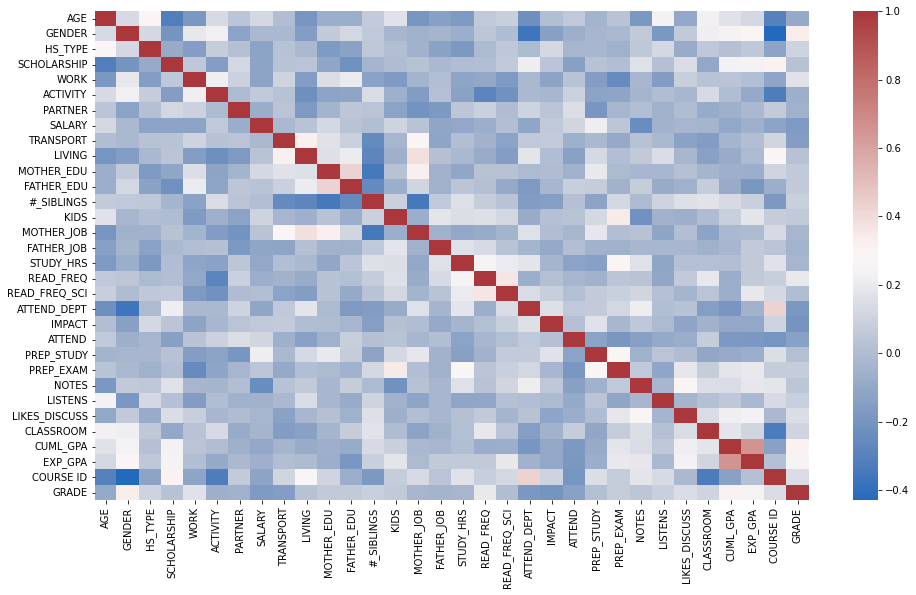

In [ ]:
plt.figure(figsize = (16, 9))
heatmap = sns.heatmap(df.corr(), cmap = "vlag")
heatmap

Pela cor do mapa, não me sentia confiante o suficiente para dropar quase nenhuma coluna, mas como não há utilidade para os atributos de identificação, dei drop nas colunas "STUDENTID" e "COURSE ID". 

In [ ]:
df = df.drop(['STUDENTID', 'COURSE ID'], axis = 1)

### B. Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando a aplicação de técnicas de under ou oversampling para que as classes tenham o mesmo tamanho.

Decidi fazer um boxplot para verificar uma das correlações que me intrigou (GENDER e GRADE) e foi atestado que os alunos do sexo masculino tiravam notas maiores que as alunas.

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

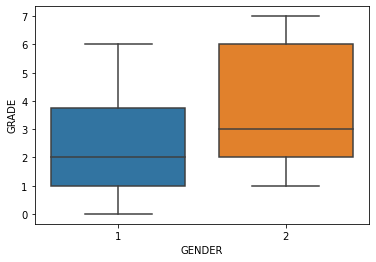

In [ ]:
sns.boxplot(x = 'GENDER', y = 'GRADE', data = df)
df['GRADE'].value_counts()

Como eu precisaria avaliar o atributo GRADE por sí só, fiz um boxplot para mostrar a situação geral dele. Percebe-se uma tendência às notas baixas. Para evitar enviesamento, apliquei oversampling.

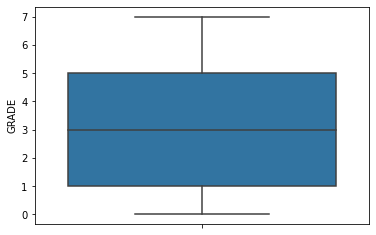

In [ ]:
sns.boxplot(y = 'GRADE', data = df)

In [ ]:
k_means = KMeansSMOTE(kmeans_estimator = 1, cluster_balance_threshold = 0.0, n_jobs = -1) # Utilizei o k_means para poder balancear o dataset

In [ ]:
df_x = df.drop(labels=['GRADE'], axis=1) # df_x é o dataset sem o atributo GRADE, e o df_y é apenas o atributo GRADE
df_x, df_y = k_means.fit_resample(df_x, df['GRADE']) # Dou fit no dataset com o k_means

df_balanceado = pd.concat([df_x, df_y], axis=1) # Criei outro dataframe, só que balanceado, para poder comparar com o dataframe original

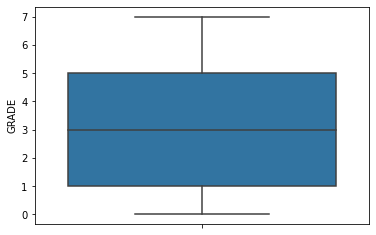

In [ ]:
sns.boxplot(y='GRADE', data=df)

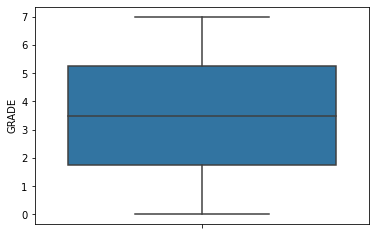

In [ ]:
sns.boxplot(y='GRADE', data=df_balanceado)

Agora está balanceado

### C. Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo, teste 3 variações de um dos seus hiperparâmetros.

In [ ]:
df_y = df_balanceado.iloc[:, -1].values # Label GRADE
df_x = df_balanceado.iloc[:, :-1].values # O resto do dataset

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 82, stratify = df_y) # Separando os itens df_x e df_y para treino e teste

Decidi usar o AutoSklearnClassifier (já que temos um problema de multiclassification) como AutoML e a estratégia de resampling eu decidi que seria melhor usar crossvalidation, pois foi dado um problema de predição.

In [ ]:
autoclassifier = AutoSklearnClassifier(
    resampling_strategy = "cv",
    resampling_strategy_arguments = {"folds": 10},
    tmp_folder = '/content/drive/MyDrive/autosklearn_model_tmp')

In [ ]:
autoclassifier.fit(X_train, y_train)  # Dando fit 
autoclassifier.refit(X_train, y_train)

[WARNING] [2022-06-24 23:38:24,080:Client-AutoML(1):bc9912fe-f416-11ec-816c-0242ac1c0002] Unknown dtype for X: int64, assuming it takes 8 bit/number


AutoSklearnClassifier(per_run_time_limit=360, resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10},
                      tmp_folder='/content/drive/MyDrive/autosklearn_model_tmp')

In [ ]:
y_true = y_test
y_pred = autoclassifier.predict(X_test)

print(f"Acurácia: {accuracy_score(y_true, y_pred)}")
print(autoclassifier.leaderboard())

Acurácia: 0.7321428571428571
          rank  ensemble_weight           type      cost   duration
model_id                                                           
151          1             0.06     libsvm_svc  0.218750   9.779711
147          2             0.02     libsvm_svc  0.227679   8.293935
140          3             0.02     libsvm_svc  0.227679   9.977540
170          4             0.06     libsvm_svc  0.227679  10.721785
2            5             0.04  random_forest  0.285714  22.894702
7            6             0.02     libsvm_svc  0.321429   8.450340
12           7             0.06  random_forest  0.321429  75.816989
21           8             0.04  random_forest  0.325893  16.479223
17           9             0.06            lda  0.330357  42.070510
16          10             0.08            lda  0.339286   7.894324
85          11             0.02     libsvm_svc  0.343750   6.495277
30          12             0.04  random_forest  0.352679  16.447577
101         13     

A acurácia foi de aproximadamente 0.73 e o melhor modelo foi o (Lib) Support Vector Machines

In [ ]:
predicts = autoclassifier.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predicts)}")

Acurácia: 0.7321428571428571


As métricas de avaliação do SVM de acordo com a função *classification_report()*

In [ ]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.38      0.43      0.40         7
           2       0.45      0.71      0.56         7
           3       0.67      0.57      0.62         7
           4       1.00      1.00      1.00         7
           5       1.00      0.86      0.92         7
           6       0.86      0.86      0.86         7
           7       1.00      0.43      0.60         7

    accuracy                           0.73        56
   macro avg       0.78      0.73      0.74        56
weighted avg       0.78      0.73      0.74        56



Recuperando os hiperparâmetros do melhor resultado do AutoML

In [ ]:
auto_results = pd.DataFrame(autoclassifier.cv_results_).sort_values(by = ["rank_test_scores"])
best_scores_hyper = auto_results.loc[auto_results.rank_test_scores == 1, "params"].squeeze()
hyperparameters = pd.DataFrame(best_scores_hyper.items())
hyperparameters

,0,1
0,balancing:strategy,weighting
1,classifier:__choice__,libsvm_svc
2,data_preprocessor:__choice__,feature_type
3,feature_preprocessor:__choice__,polynomial
4,classifier:libsvm_svc:C,20.137084
5,classifier:libsvm_svc:gamma,6.988211
6,classifier:libsvm_svc:kernel,rbf
7,classifier:libsvm_svc:max_iter,-1
8,classifier:libsvm_svc:shrinking,False
9,classifier:libsvm_svc:tol,0.00012


Escolhi modificar o hiperparâmetro *kernel* pra ver o quanto influenciava na predição. Não foi preciso passar os hiperparâmetro *max_iter* no classificador, ele já possui o valor padrão idêntico.

In [ ]:
svm_base = SVC(C = 20.137084, gamma = 6.988211, shrinking = False, tol = 0.00012, kernel = 'rbf')
svm_one = SVC(C = 20.137084, gamma = 6.988211, shrinking = False, tol = 0.00013, kernel = 'linear')
svm_two = SVC(C = 20.137084, gamma = 6.988211, shrinking = False, tol = 0.00013, kernel = 'poly')
svm_three = SVC(C = 20.137084, gamma = 6.988211, shrinking = False, tol = 0.00012, kernel = 'sigmoid')

### D. Para avaliar os resultados, utilize e explique a matriz de confusão. Além disso, escolha 2 métricas de sua preferência e o que o seu resultado significa.

Modelo Base - kernel = RBF

Acurácia: 0.23214285714285715
F1 Score: 0.21125730994152048


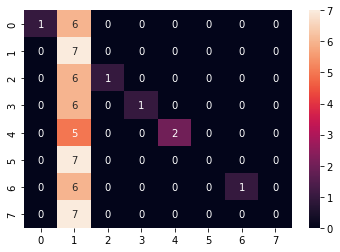

In [ ]:
svm_base.fit(X_train, y_train)
predict_base = svm_base.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict_base)}")
print(f"F1 Score: {f1_score(y_test, predict_base, average='macro')}")

c_mat = confusion_matrix(y_test, predict_base)
sns.heatmap(c_mat, annot = True)
plt.show()

Modelo Um - kernel = Linear

Acurácia: 0.5
F1 Score: 0.49188629997453526


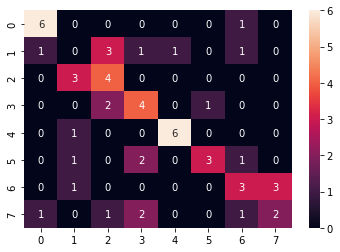

In [ ]:
svm_one.fit(X_train, y_train)
predict_one = svm_one.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict_one)}")
print(f"F1 Score: {f1_score(y_test, predict_one, average='macro')}")

c_mat_one = confusion_matrix(y_test, predict_one)
sns.heatmap(c_mat_one, annot = True)
plt.show()

Modelo Dois - kernel = Poly

Acurácia: 0.5892857142857143
F1 Score: 0.5681818181818181


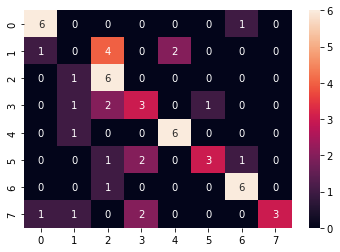

In [ ]:
svm_two.fit(X_train, y_train)
predict_two = svm_two.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict_two)}")
print(f"F1 Score: {f1_score(y_test, predict_two, average='macro')}")

c_mat_two = confusion_matrix(y_test, predict_two)
sns.heatmap(c_mat_two, annot = True)
plt.show()

Modelo Três - kernel = Sigmoid

Acurácia: 0.125
F1 Score: 0.027777777777777776


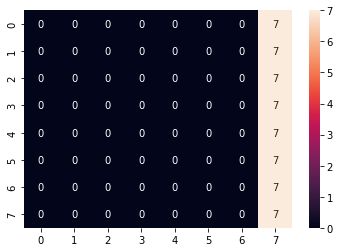

In [ ]:
svm_three.fit(X_train, y_train)
predict_three = svm_three.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, predict_three)}")
print(f"F1 Score: {f1_score(y_test, predict_three, average='macro')}")

c_mat_three = confusion_matrix(y_test, predict_three)
sns.heatmap(c_mat_three, annot = True)
plt.show()

Minha conclusão é que por mais que a acurácia do Modelo Três seja altíssima, o F1 Score dela é muito baixo, o que indica que a precisão também está próxima disso. Eu diria que os melhores modelos são os Modelo Um e Dois, pois suas métricas de avaliação estão mais balanceadas, por mais que a acurácia não passe de 60%.

# Segunda Questão
## Utilize a mesma base de dados (lembrem de tirar o rótulo, obviamente) da questão anterior de forma que:
### A. Execute o K-means e Hierárquico.

Retirando o rótulo do dataframe que já estava balanceado, aplicando um RobustScaler e armazenando em uma variável chamada *df_x*.

In [ ]:
df_x = df_balanceado.copy()
df_x = df_x.drop(["GRADE"], axis = 1)
df_x = RobustScaler().fit_transform(df_x)

Me foi sugerido pelos colegas usar Silhouette Score como método para avaliar os clusters, então eu decidi aceitar a sugestão.

### B. Teste o K igual à 5 e 7.

In [ ]:
k_five = KMeans(n_clusters = 5)
k_seven = KMeans(n_clusters = 7)

k_five.fit(df_x)
k_seven.fit(df_x)

print(f"K-Means K = 5: {silhouette_score(df_x, k_five.labels_)}")
print(f"K-Means K = 7: {silhouette_score(df_x, k_seven.labels_)}")

K-Means K = 5: 0.0956386863756323
K-Means K = 7: 0.10799162065508996


### C. Na execução do Hierárquico, varie 2 métodos do linkage;
> ### OBS.: utilize os mesmos valores de clusters escolhidos na questão anterior.



Linkage = ward

In [ ]:
h_five = AgglomerativeClustering(n_clusters = 5)
h_seven = AgglomerativeClustering(n_clusters = 7)

h_five.fit(df_x)
h_seven.fit(df_x)

print(f"Hierárquico Ward K = 5: {silhouette_score(df_x, h_five.labels_)}")
print(f"Hierárquico Ward K = 7: {silhouette_score(df_x, h_seven.labels_)}")

Hierárquico Ward K = 5: 0.0671590291399079
Hierárquico Ward K = 7: 0.0871649638132213


Linkage = complete

In [ ]:
h_five_comp = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
h_seven_comp = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')

h_five_comp.fit(df_x)
h_seven_comp.fit(df_x)

print(f"Hierárquico Complete K = 5: {silhouette_score(df_x, h_five_comp.labels_)}")
print(f"Hierárquico Complete K = 7: {silhouette_score(df_x, h_seven_comp.labels_)}")

Hierárquico Complete K = 5: 0.05387649346562016
Hierárquico Complete K = 7: 0.05604629626014073


Linkage = average

In [ ]:
h_five_average = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
h_seven_average = AgglomerativeClustering(n_clusters = 7, linkage = 'average')

h_five_average.fit(df_x)
h_seven_average.fit(df_x)

print(f"Hierárquico Average K = 5: {silhouette_score(df_x, h_five_average.labels_)}")
print(f"Hierárquico Average K = 7: {silhouette_score(df_x, h_seven_average.labels_)}")

Hierárquico Average K = 5: 0.11907704848865985
Hierárquico Average K = 7: 0.06981030887733279


### D. Por fim, faça uma comparação entre os 2 resultados das execuções

Criando os gráficos do K-Means

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff577682610>,
                     estimator=KMeans(n_clusters=5))

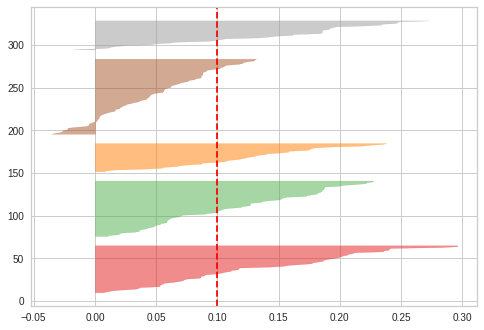

In [ ]:
k_five_plot = SilhouetteVisualizer(k_five)
k_five_plot.fit(df_x)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff577625590>,
                     estimator=KMeans(n_clusters=7))

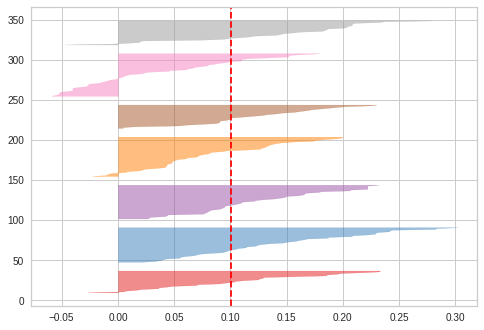

In [ ]:
k_seven_plot = SilhouetteVisualizer(k_seven)
k_seven_plot.fit(df_x)

Dentre os K escolhidos para o K-Means, o de melhor resultado foi K = 7, pois quanto mais próximo de 1 no gráfico do Silhouette, mais longe de outro cluster estão os pontos, logo ficam mais fáceis de classificar.

Não dá para criar gráficos do Hierárquico porque ele não retorna predições.

Entre os resultados do AgglomerativeClustering, o melhor é o Hierárquico com linkage "Average" e K = 5, mas com um valor de apenas 0.11, o que chega a ser um pouco decepcionante, pois eu esperava números maiores.
O pior entre os diferentes tipos de linkage foi o "Complete", que em ambos K, retornou valores de 0.05.